### Problem statement :
we have consolidated the data for each of the player sold in the IPL 2022 auction and that of the retained player from franchise 

### The data contains information like:

matches played,runs,wickets,average,strike rate,catches,runouts,stumps,etc

### Based on these data points:

we will try to create the best 11 from these set of players from the current campaign

1.Extraction and loading the data

2.cleaning the data and removing the noise

3.Analyze the data on different parameters

4.Visualizing the important stastical findings.

5.Making the best team of 11-based on the ICC wowrld cup winning squad formation and last year's squad formation of the winning team in the IPL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Loading the data

In [3]:
df=pd.read_csv('IPLData.csv')

In [4]:
df.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [6]:
df.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [7]:
df.isnull().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

# cleaning the data

In the above data the players can be initially segragated based on following parameters

1.Capped = Batters,Bowlers,Allrounders,Wicket_keeper

2.Uncapped = Batters,Bowlers,Allrounders,Wicket_keeper

The uncapped players are playing the IPL for the first time or relavant data isn't available therefore we have used their domestic T20 performance and T20 international performance

In [8]:
df.groupby(['Player_Type'])['Capped'].value_counts()

Player_Type  Capped
Allrounder   1         52
             0         21
             2         14
Batter       1         32
             0         14
             2          1
Bowler       1         53
             0         16
             2          6
Keeper       1         18
             0          8
Name: Capped, dtype: int64

In [40]:
df['Player_Type'].value_counts()

Allrounder    87
Bowler        75
Batter        47
Keeper        26
Name: Player_Type, dtype: int64

In [9]:
#Segregating Data -Capped batters

batters=df.loc[(df['Player_Type']=='Batter')]
batter_new=batters.loc[(batters['Capped']==1)]
capped_batters=batter_new[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate']]

In [10]:
#the segregations of the batter based on the capped data gives us the batters that have a history of playing IPL matches
capped_batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [64]:
df['Player_Type']=df['Player_Type'].str.strip(" ")

In [65]:
df['Player_Type']=='Bowler'

0      False
1      False
2      False
3      False
4      False
       ...  
230     True
231    False
232    False
233    False
234     True
Name: Player_Type, Length: 235, dtype: bool

In [70]:
#Segregating Data -Capped bowlers
df['Player_Type'].str.get('Bowler')
bowlers=df.loc[(df['Player_Type']=='Bowler')]
bowler_new=bowlers.loc[(bowlers['Capped']==1)]
capped_bowlers=bowler_new[['Player Name','Team','Nationality','Matches_Played','Wickets','Bowling_average','Economy','Bowling_Strike_Rate']]

In [71]:
#the segregations of the bowlers based on the capped data gives us the bowlers that have a history of playing IPL matche
capped_bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44


In [72]:
keepers=df.loc[(df['Player_Type']=='Keeper')]
keeper_new=keepers.loc[(keepers['Capped']==1)]
capped_keepers=keeper_new[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate','Catches','Run_outs','Stumps']]

In [73]:
capped_keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [74]:
Allrounder=df.loc[(df['Player_Type']=='Allrounder')]
Allrounder_new=Allrounder.loc[(Allrounder['Capped']==1)]
capped_Allrounders=Allrounder_new[['Player Name','Team','Nationality','Matches_Played','Runs','Wickets','Average','Strike_Rate','Catches','Run_outs','Economy','Bowling_average','Bowling_Strike_Rate']]

In [75]:
capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,145.0,11.12,109.88,NaN,NaN,6.91,27.80,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,NaN,NaN,8.24,30.13,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,167.0,22.94,130.25,NaN,NaN,8.36,24.32,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,7.0,28.00,132.46,NaN,NaN,8.03,22.00,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,35.0,14.54,121.15,NaN,NaN,8.20,22.46,16.43


In [103]:
# cleaning the data by making null or NaN values 0
capped_batters=capped_batters.fillna(0)
capped_Allrounders=capped_Allrounders.fillna(0)
capped_keepers=capped_keepers.fillna(0)
capped_bowlers=capped_bowlers.fillna(0)

In [104]:
#checking null values in data
print(capped_batters.isnull().sum())
print(capped_bowlers.isnull().sum())
print(capped_Allrounders.isnull().sum())
print(capped_keepers.isnull().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Wickets                0
Average                0
Strike_Rate            0
Catches                0
Run_outs               0
Economy                0
Bowling_average        0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


In [78]:
##initial analysis


In [105]:
#Analyzing the batter Data
top_batters=capped_batters.loc[(capped_batters['Average']>=32.0)]

top_batters_average =top_batters.sort_values('Average',ascending=False)
top_batters_Strike_rate =top_batters.sort_values('Strike_Rate',ascending=False)
top_batters_runs =top_batters.sort_values('Runs',ascending=False)
top_batters_matches =top_batters.sort_values('Matches_Played',ascending=False)

In [106]:
#the data of each of batter in descending order of batting averages
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [107]:
#the data of each of batter in descending order of strike rate
top_batters_Strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [108]:
#the runs scored data of the batter in descending order
top_batters_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [109]:
#the batter matches played in descending order
top_batters_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


### From our analysis we get 3 top player
1.david warner

2.KL rahul

3.Virat Kohli

In [297]:
#Analyzing the bowler Data

In [124]:
top_bowlers=capped_bowlers.loc[(capped_bowlers['Bowling_average']<=24.0)]

top_bowlers_average =top_bowlers.sort_values('Bowling_average',ascending=False)
top_bowlers_Strike_rate =top_bowlers.sort_values('Bowling_Strike_Rate',ascending=False)
top_bowlers_wickets =top_bowlers.sort_values('Wickets',ascending=False)
top_bowlers_economy =top_bowlers.sort_values('Economy',ascending=True)
top_bowlers_matches =top_bowlers.sort_values('Matches_Played',ascending=False)

In [125]:
# top bowlers according to averages
top_bowlers_average

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00


In [126]:
#top bowler according strike rate
top_bowlers_Strike_rate

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00


In [127]:
#top bowler by wickets
top_bowlers_wickets

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00


In [128]:
#top bowler by economy
top_bowlers_economy

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67


In [130]:
# top bowlers by match played
top_bowlers_matches

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00


### From above analysis if we rank down the parameter from 1-10.the top bowling options are as follow

1.Kagiso rabada

2.Yuzvendra chahal

3.Jasprit Bumrah

4.Nathan Coluter Nile

In [299]:
# Analyzing the all_rounder data

In [156]:
#segregating all_rounder data based on strike rate greater than 140

top_Allrounders=capped_Allrounders.loc[(capped_Allrounders['Strike_Rate']>=140.0)]

top_Allrounders_matches=top_Allrounders.sort_values('Matches_Played',ascending=False)
top_Allrounders_runs=top_Allrounders.sort_values('Runs',ascending=False)
top_Allrounders_wickets=top_Allrounders.sort_values('Wickets',ascending=False)
top_Allrounders_strike_rate=top_Allrounders.sort_values('Strike_Rate',ascending=False)
top_Allrounders_average=top_Allrounders.sort_values('Average',ascending=False)
top_Allrounders_bowling_average=top_Allrounders.sort_values('Bowling_average',ascending=True)
top_Allrounders_economy=top_Allrounders.sort_values('Economy',ascending=True)
top_Allrounders_bowling_strike=top_Allrounders.sort_values('Bowling_Strike_Rate',ascending=True)

In [144]:
#Top all_rounder by matches
top_Allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,42.0,27.33,153.91,0.0,0.0,9.07,31.26,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,0.0,0.0,8.24,30.13,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,13.0,14.31,169.09,0.0,0.0,8.26,43.23,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38


In [147]:
#Top all_rounder by runs
top_Allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,42.0,27.33,153.91,0.0,0.0,9.07,31.26,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,0.0,0.0,8.24,30.13,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,13.0,14.31,169.09,0.0,0.0,8.26,43.23,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38


In [148]:
#Top all_rounder by Wickets
top_Allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,42.0,27.33,153.91,0.0,0.0,9.07,31.26,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,0.0,0.0,8.24,30.13,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,13.0,14.31,169.09,0.0,0.0,8.26,43.23,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38


In [149]:
#Top all_rounder by strike_rate
top_Allrounders_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,13.0,14.31,169.09,0.0,0.0,8.26,43.23,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,42.0,27.33,153.91,0.0,0.0,9.07,31.26,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,0.0,13.30,148.10,0.0,0.0,7.00,0.00,0.00
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69


In [150]:
#Top all_rounder by average
top_Allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,42.0,27.33,153.91,0.0,0.0,9.07,31.26,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,0.0,0.0,8.24,30.13,21.95
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,13.0,14.31,169.09,0.0,0.0,8.26,43.23,31.38


In [155]:
#Top all_rounder by bowling_average
top_Allrounders_bowling_average

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,0.0,13.30,148.10,0.0,0.0,7.00,0.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,0.0,0.0,8.24,30.13,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,42.0,27.33,153.91,0.0,0.0,9.07,31.26,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18


In [152]:
#Top all_rounder by economy
top_Allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69
202,Aman Khan,Kolkata,Indian,5.0,40.0,0.0,13.30,148.10,0.0,0.0,7.00,0.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,0.0,0.0,8.24,30.13,21.95
154,K Gowtham,Lucknow,Indian,24.0,186.0,13.0,14.31,169.09,0.0,0.0,8.26,43.23,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51


In [157]:
#Top all_rounder by bowling_strike
top_Allrounders_bowling_strike

,Player Name,Team,Nationality,Matches_Played,Runs,Wickets,Average,Strike_Rate,Catches,Run_outs,Economy,Bowling_average,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,0.0,13.30,148.10,0.0,0.0,7.00,0.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,72.0,29.31,178.57,0.0,0.0,9.05,26.40,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,46.0,15.00,157.26,0.0,0.0,7.13,21.33,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,42.0,27.33,153.91,0.0,0.0,9.07,31.26,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,65.0,29.98,149.77,0.0,0.0,8.78,31.62,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,143.0,15.64,161.69,0.0,0.0,6.74,24.53,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,38.0,19.75,140.44,0.0,0.0,8.24,30.13,21.95
223,Moeen Ali,Chennai,Overseas,34.0,666.0,16.0,22.97,146.37,0.0,0.0,6.85,29.31,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,13.0,15.00,151.26,0.0,0.0,7.14,31.38,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,22.0,25.23,151.84,0.0,0.0,8.55,41.59,29.18


### From the above analysis  if we rank down the allrounders from 1-10 on various parameter .The top allrounder are as follow:

1.Andre Russell

2.Sunil Narine

3.Hardik Pandya

4.Jofra Archer

In [ ]:
#Analyzing the keeper data

In [161]:
top_keepers=capped_keepers.loc[(capped_keepers['Average']>=25.0)]

top_keepers_average = top_keepers.sort_values('Average',ascending=False)
top_keepers_matches_played = top_keepers.sort_values('Matches_Played',ascending=False)
top_keepers_runs = top_keepers.sort_values('Runs',ascending=False)
top_keepers_catches = top_keepers.sort_values('Catches',ascending=False)
top_keepers_run_outs = top_keepers.sort_values('Run_outs',ascending=False)
top_keepers_stumps = top_keepers.sort_values('Stumps',ascending=False)
top_keepers_strike_rate = top_keepers.sort_values('Strike_Rate',ascending=False)


In [170]:
#Top keepers by avaerage
top_keepers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [167]:
#Top keepers by matches
top_keepers_matches_played

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [164]:
#Top keepers by runs
top_keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [165]:
#Top keepers by catches
top_keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [166]:
#Top keepers by run_outs
top_keepers_run_outs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [168]:
#Top keepers by stumps
top_keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


In [169]:
#Top keepers by stike_rate
top_keepers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


### From the above analysis  if we rank down the keepers from 1-10 on various parameter .The top keepers are as follow:

1.MS Dhoni

2.Dinesh Kartik

3.Rishabh Pant

### Visualization For Enhanced Analysis

now the initial analysis done that has been done on the segregate data.you can create a few visuals representation of the same get better analysis of the data

<AxesSubplot:xlabel='Player Name', ylabel='Strike_Rate'>

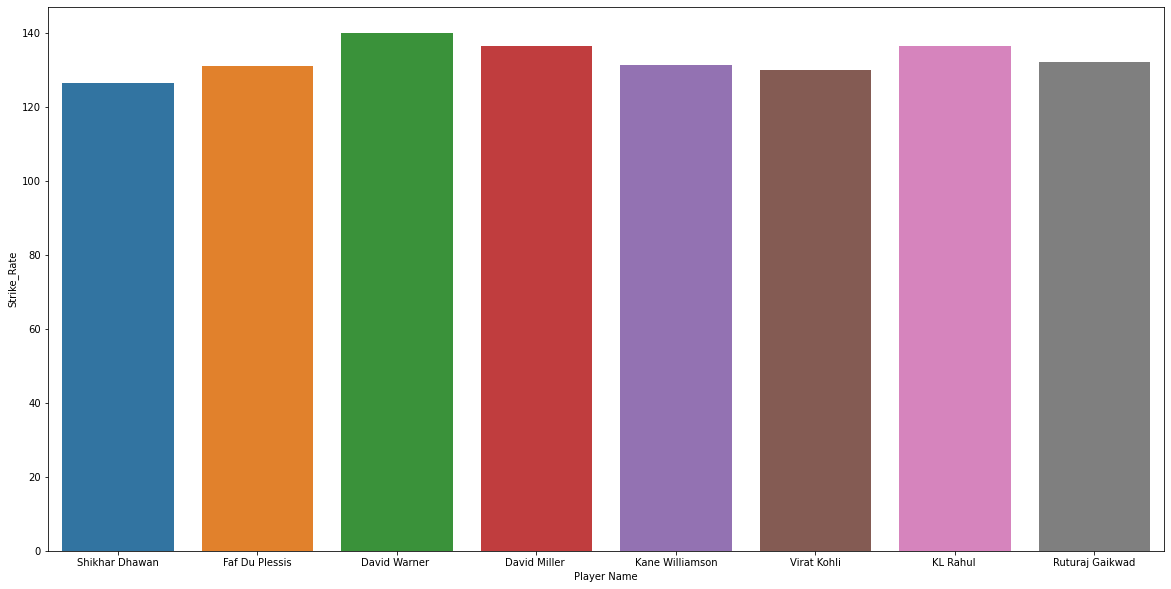

In [173]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_batters)

<AxesSubplot:xlabel='Player Name', ylabel='Average'>

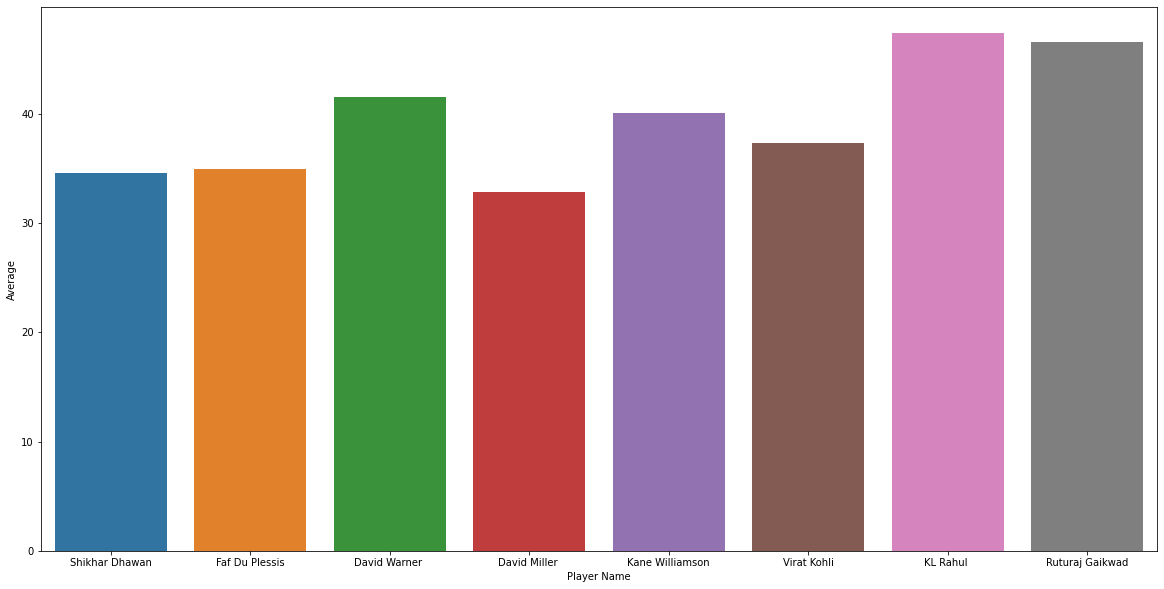

In [176]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_batters)

<AxesSubplot:xlabel='Player Name', ylabel='Runs'>

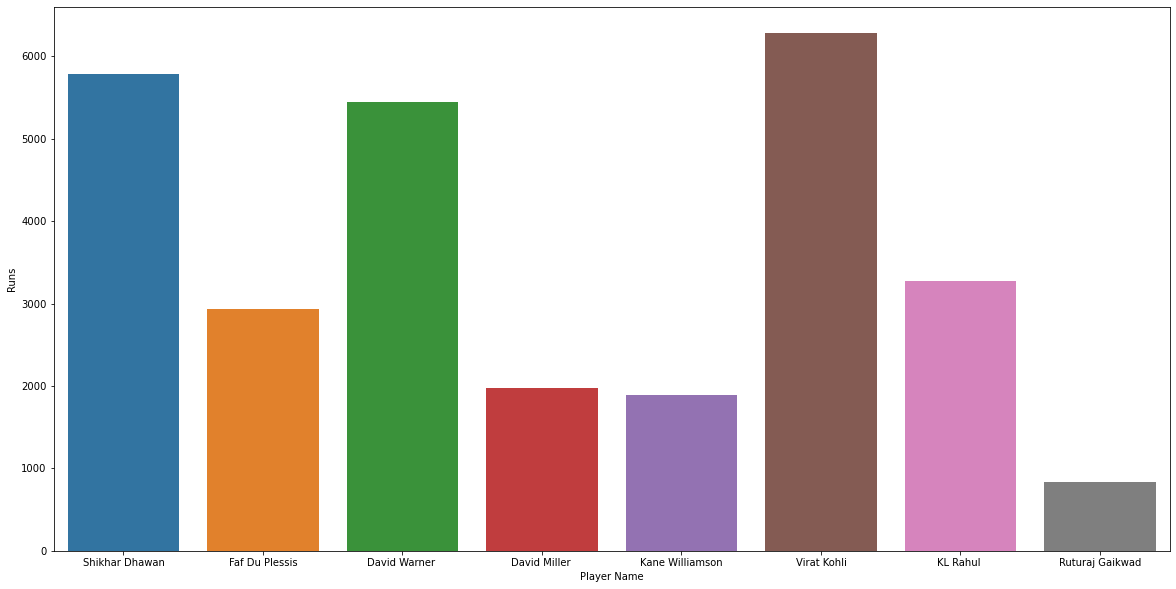

In [177]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_batters)

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

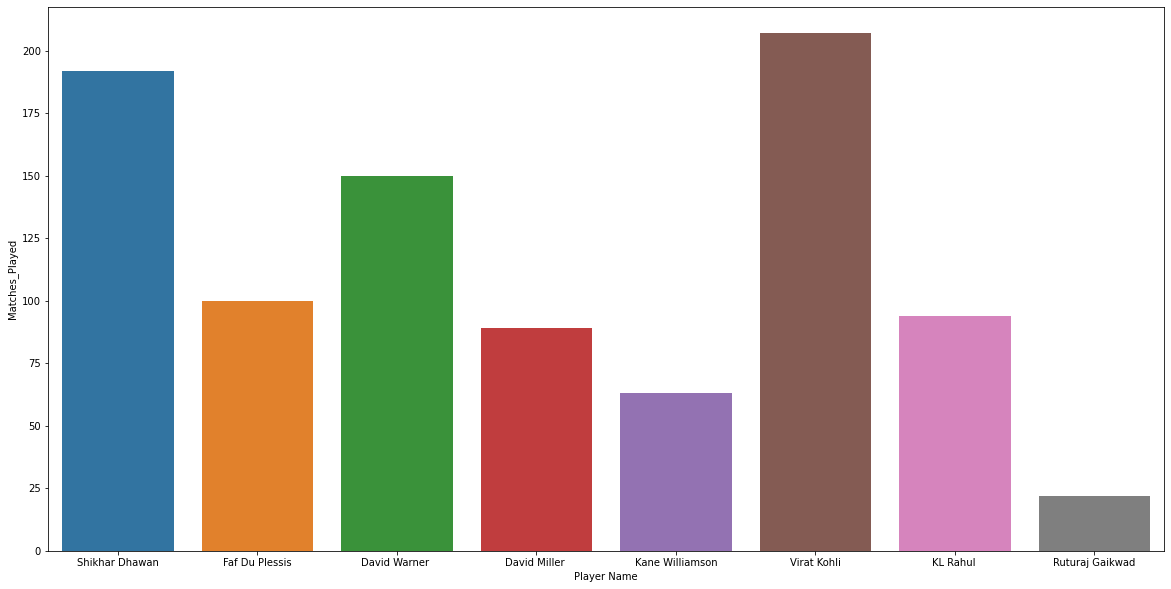

In [182]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_batters)

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_average'>

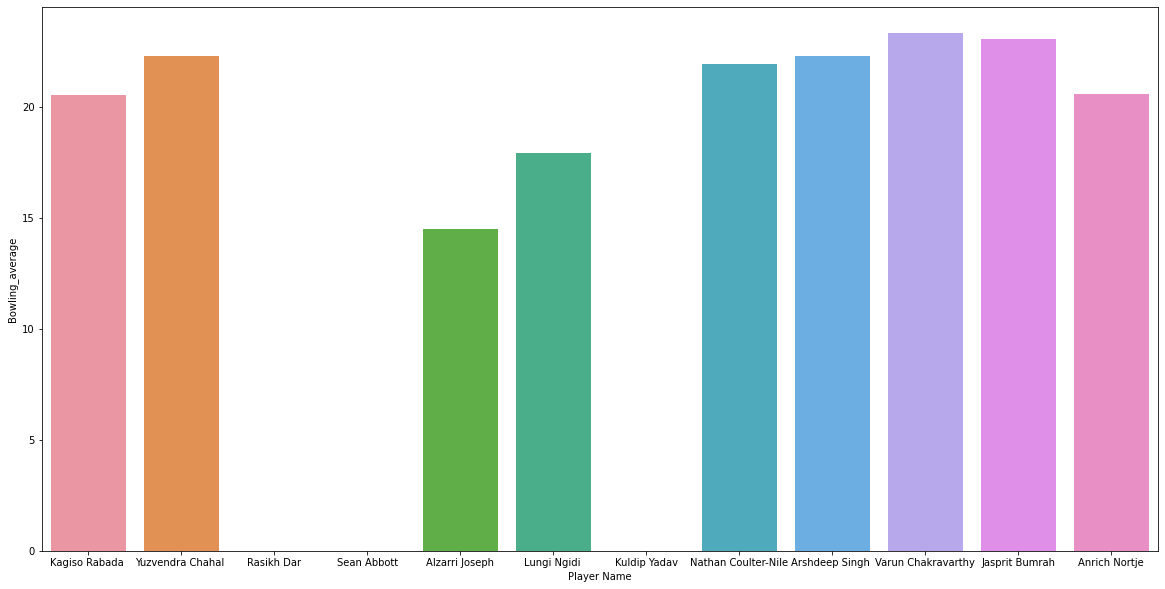

In [184]:
#Visualization of bowler data

plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_average',data=top_bowlers)

<AxesSubplot:xlabel='Player Name', ylabel='Wickets'>

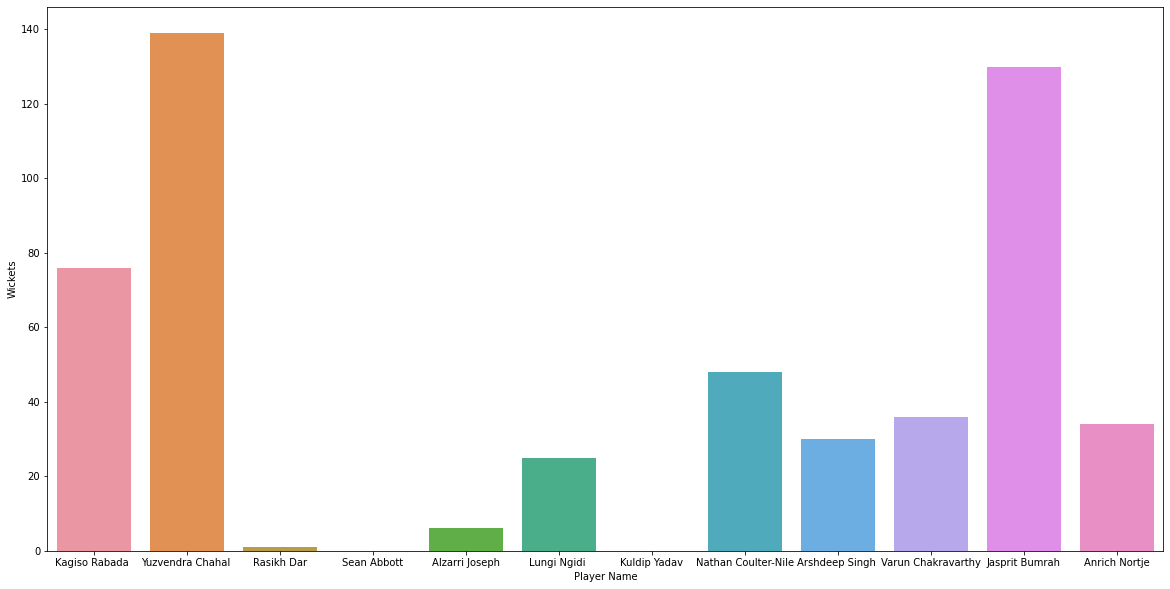

In [185]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Wickets',data=top_bowlers)

<AxesSubplot:xlabel='Player Name', ylabel='Economy'>

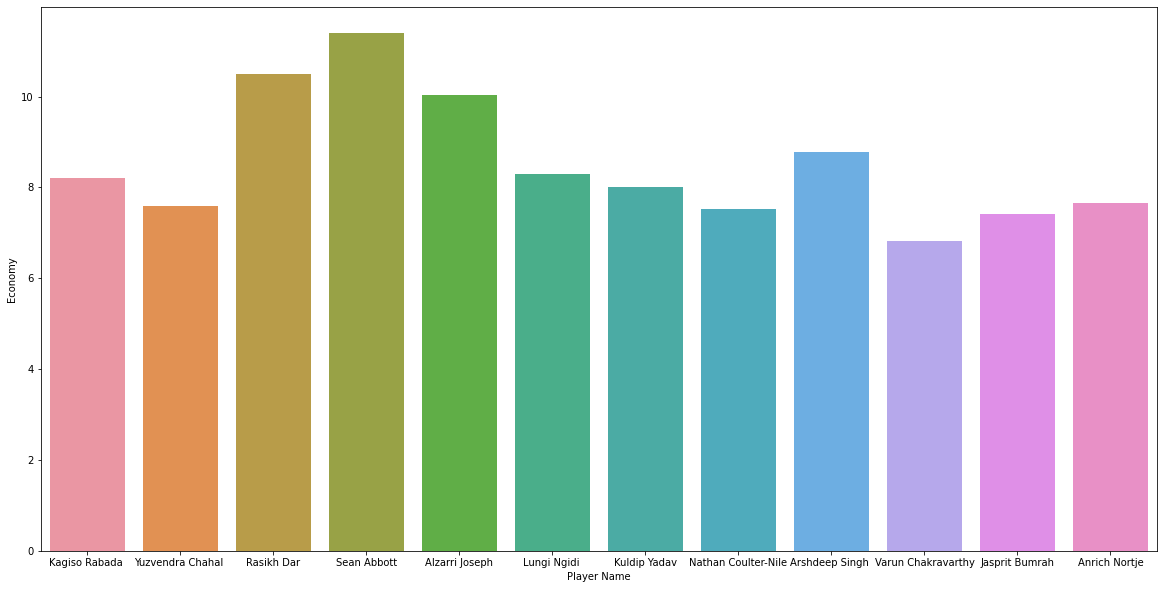

In [186]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Economy',data=top_bowlers)

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

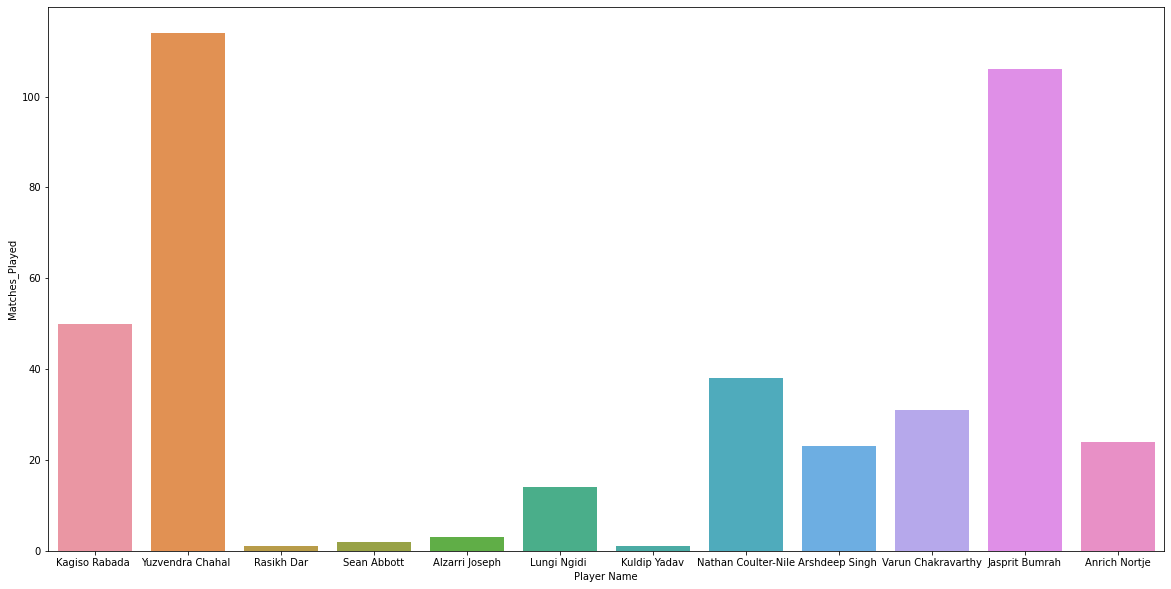

In [188]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_bowlers)

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

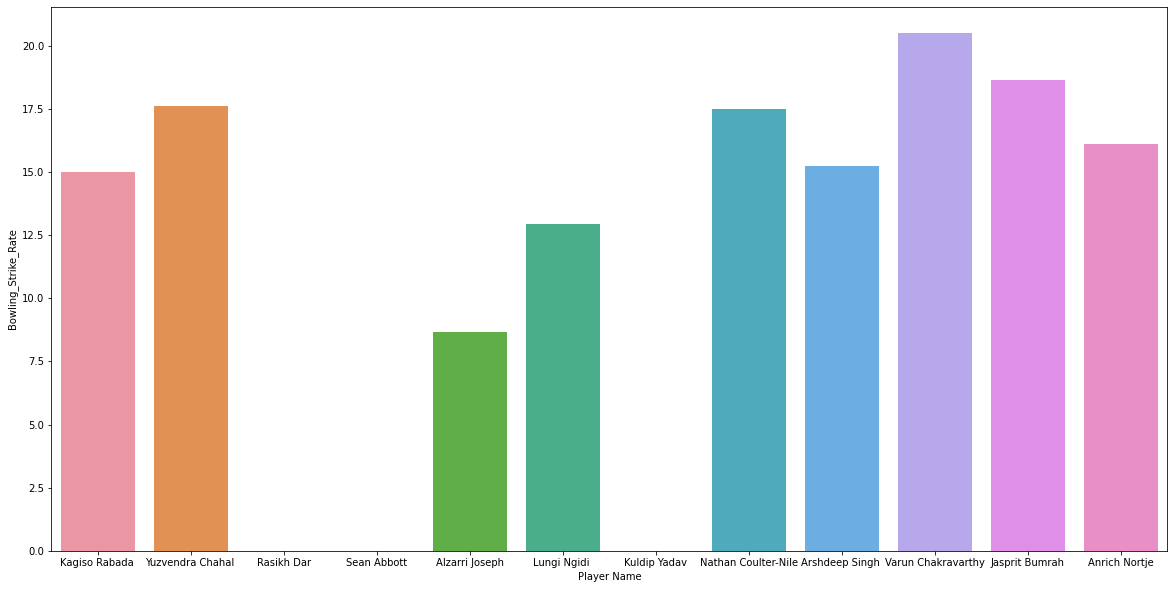

In [189]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_Strike_Rate',data=top_bowlers)

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_average'>

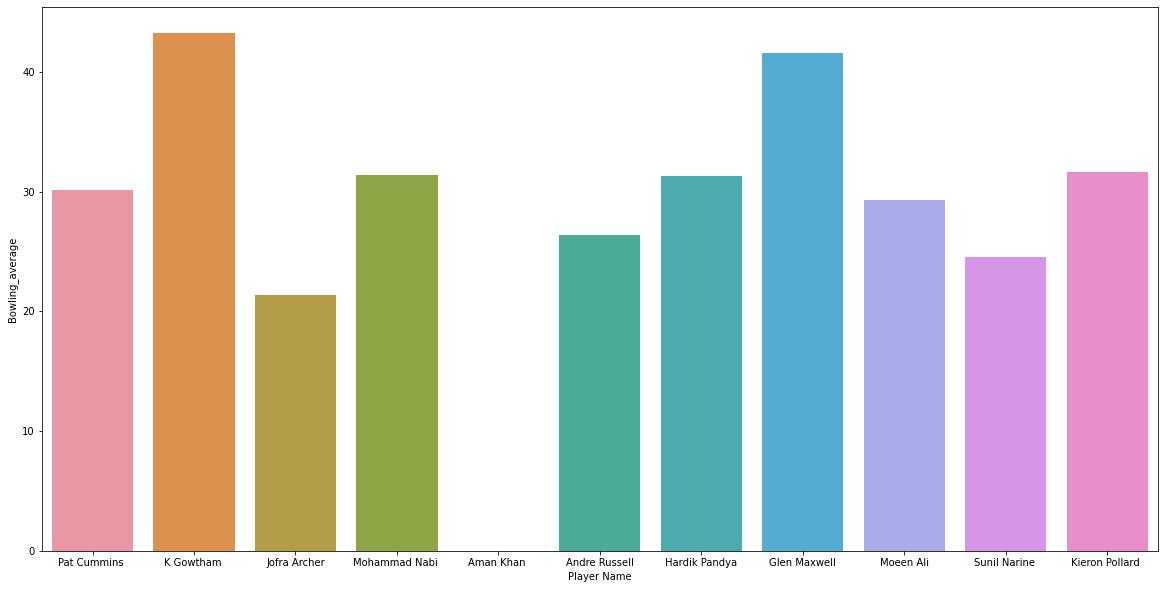

In [191]:
#Visualization of All-rounder

plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_average',data=top_Allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Runs'>

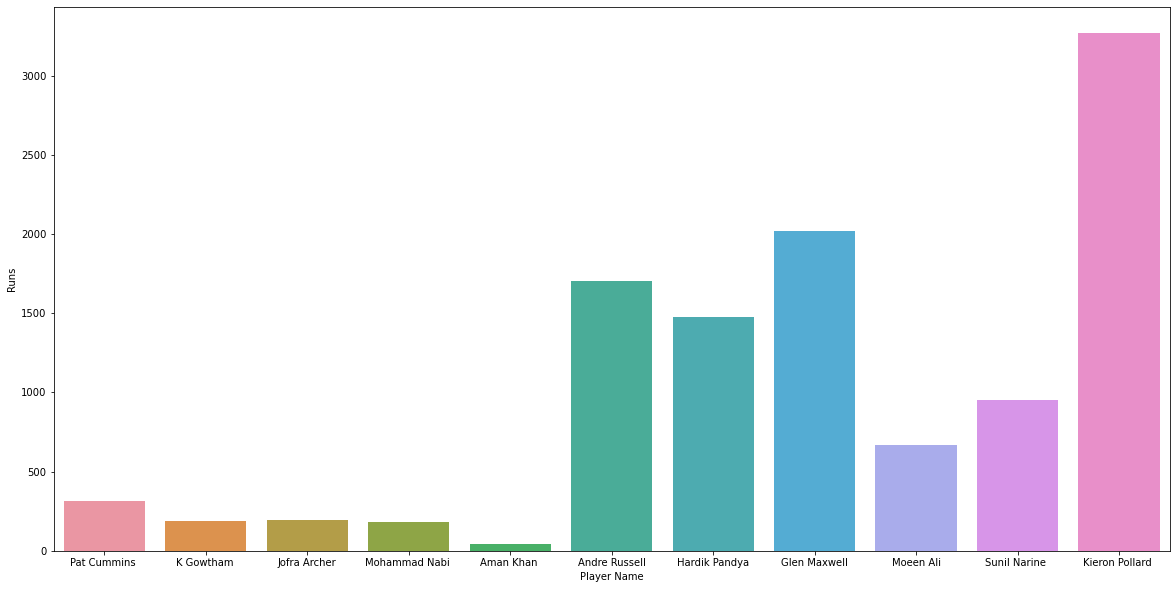

In [192]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_Allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Wickets'>

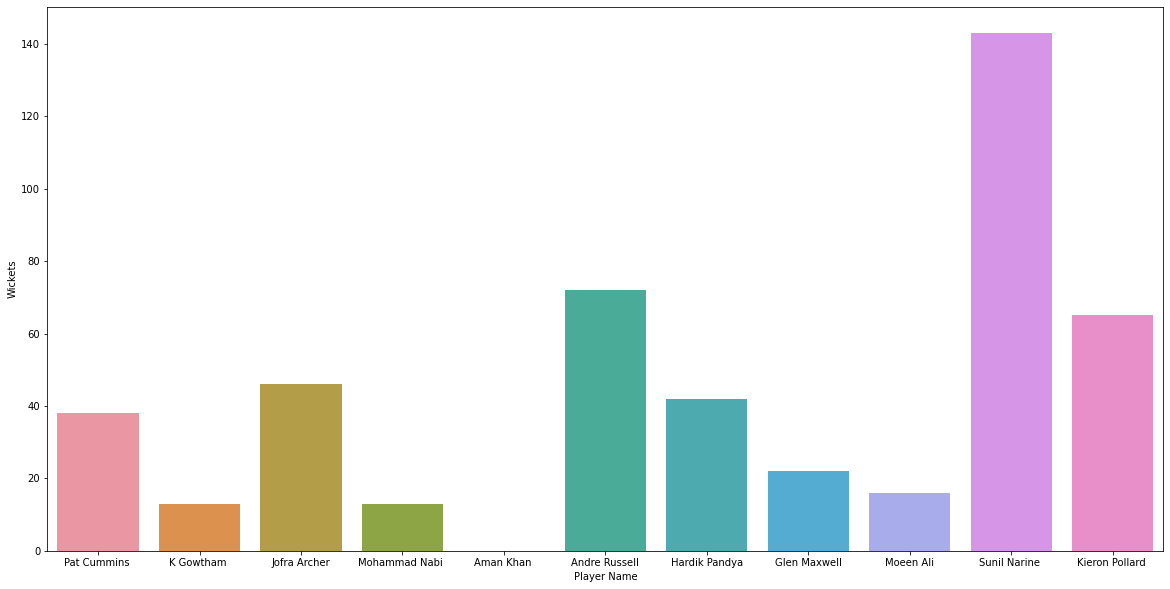

In [193]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Wickets',data=top_Allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

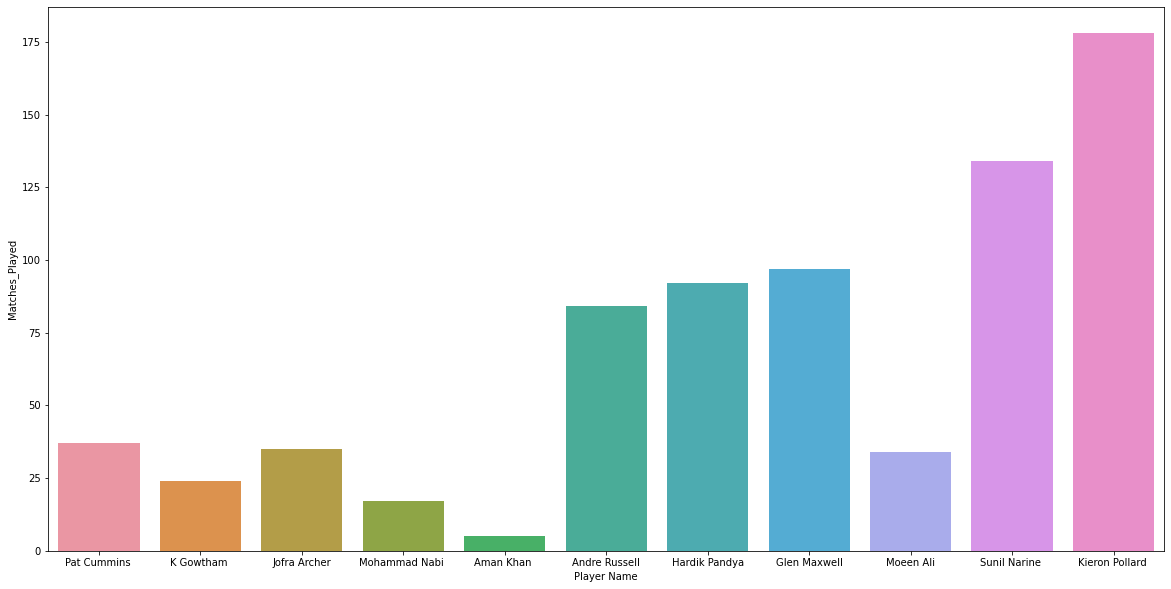

In [194]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_Allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

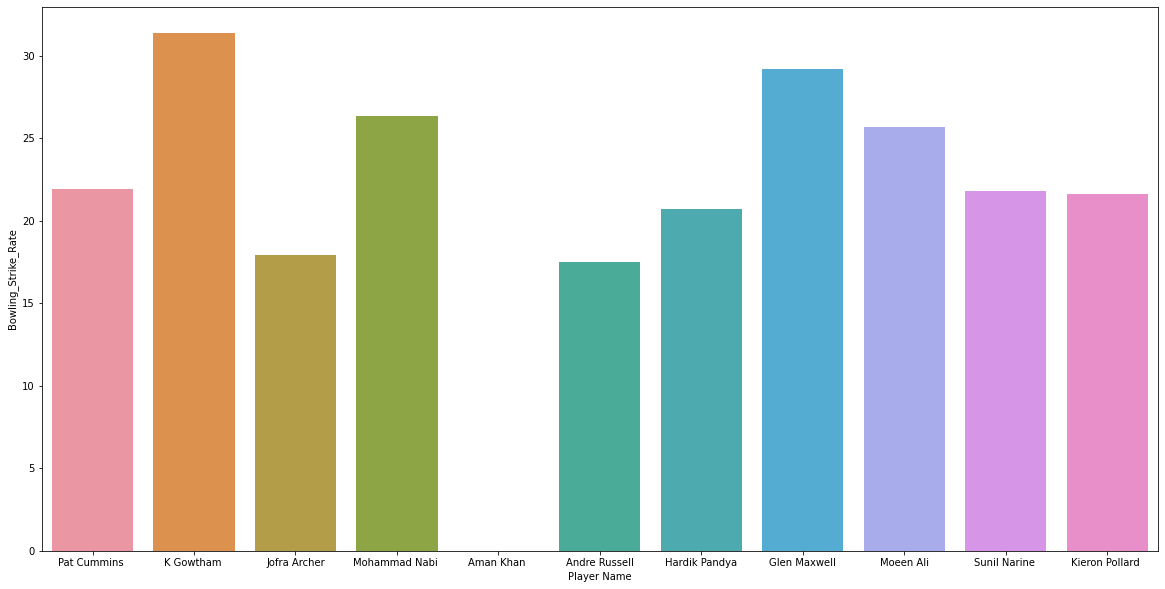

In [195]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_Strike_Rate',data=top_Allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Average'>

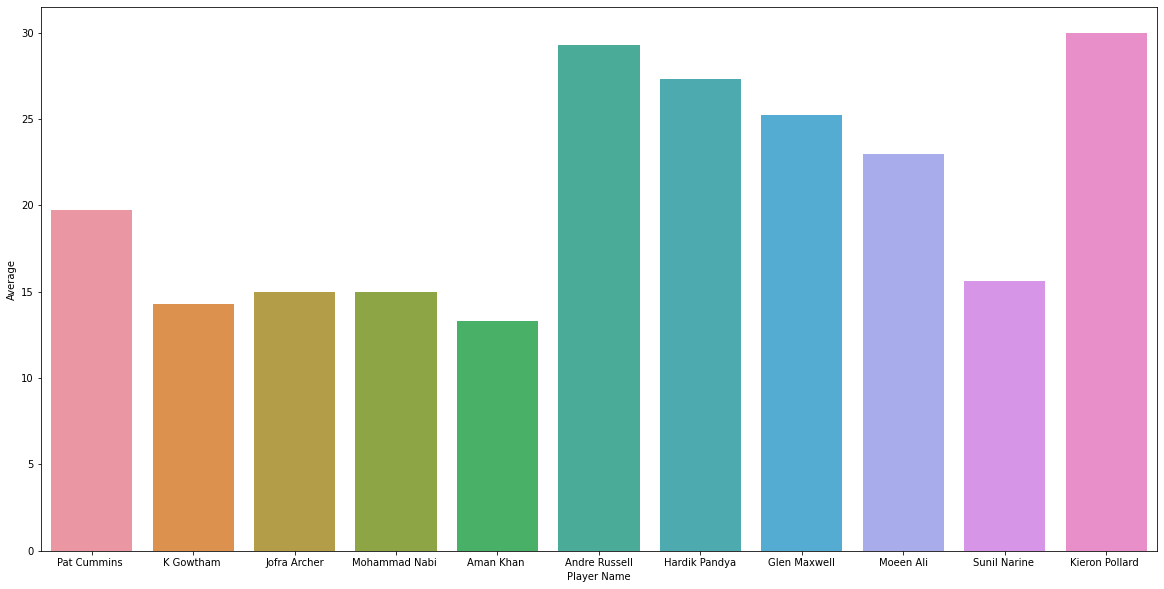

In [196]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_Allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Economy'>

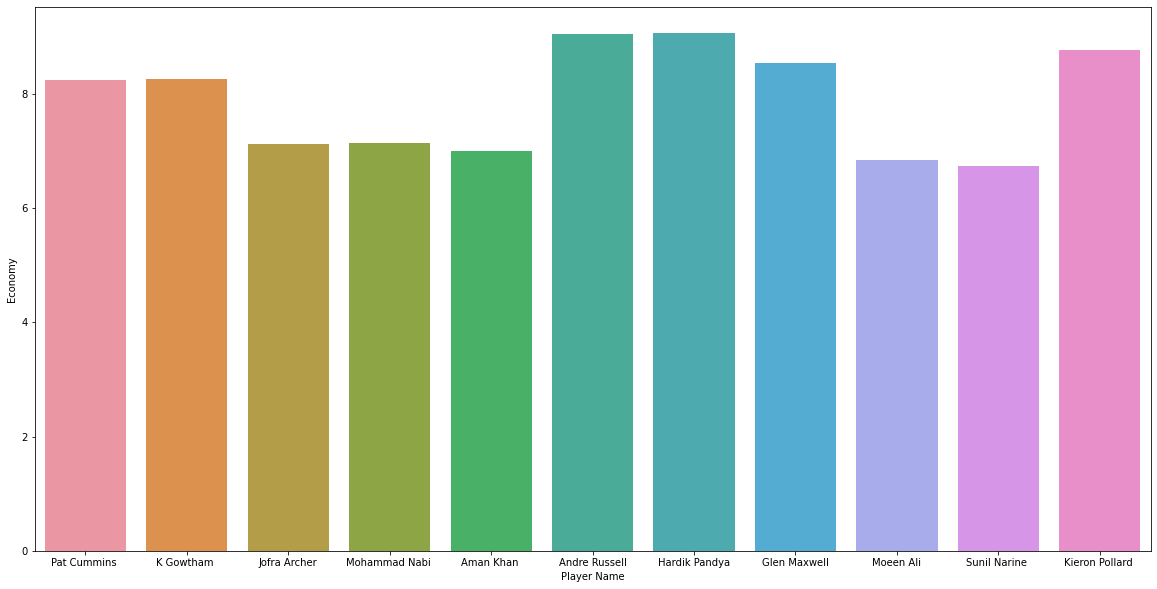

In [197]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Economy',data=top_Allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Catches'>

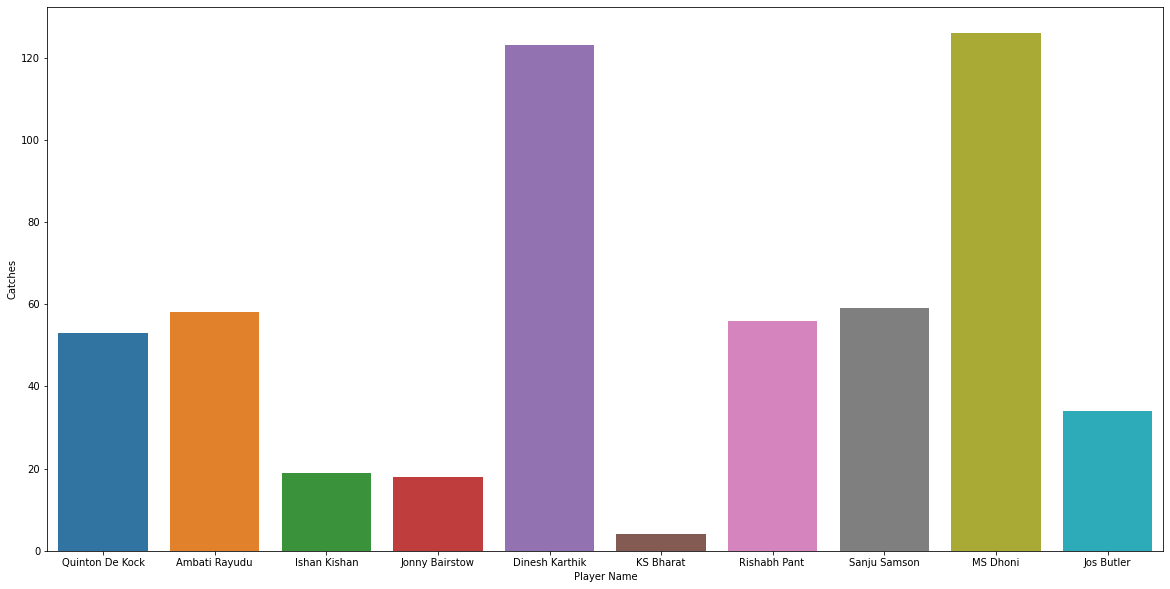

In [198]:
#Visualization of keepers data

plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Catches',data=top_keepers)

<AxesSubplot:xlabel='Player Name', ylabel='Runs'>

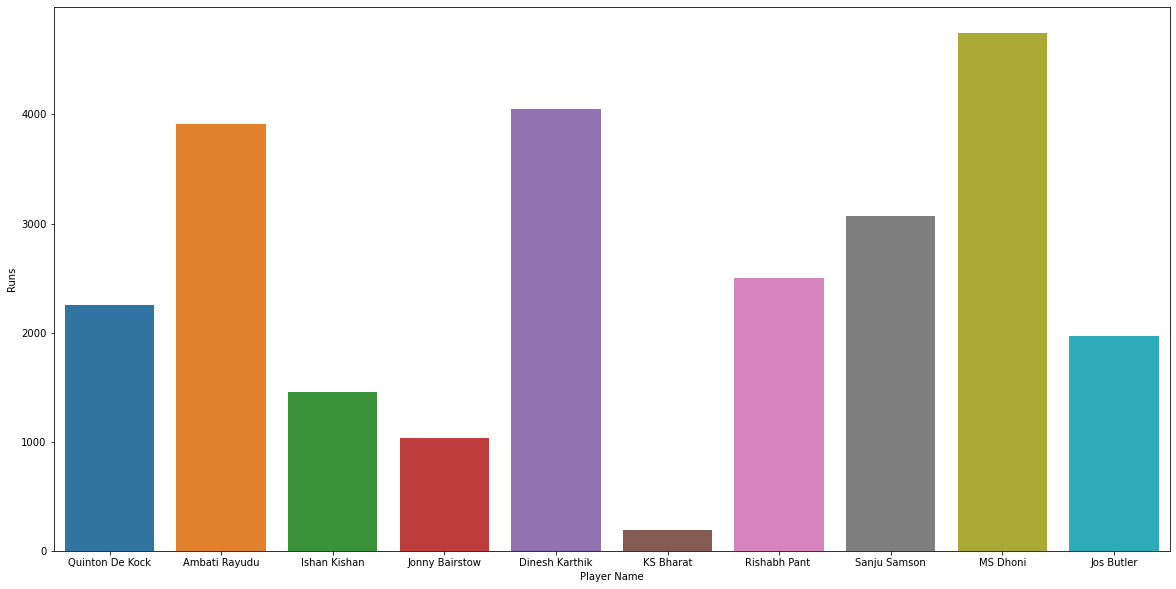

In [199]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_keepers)

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

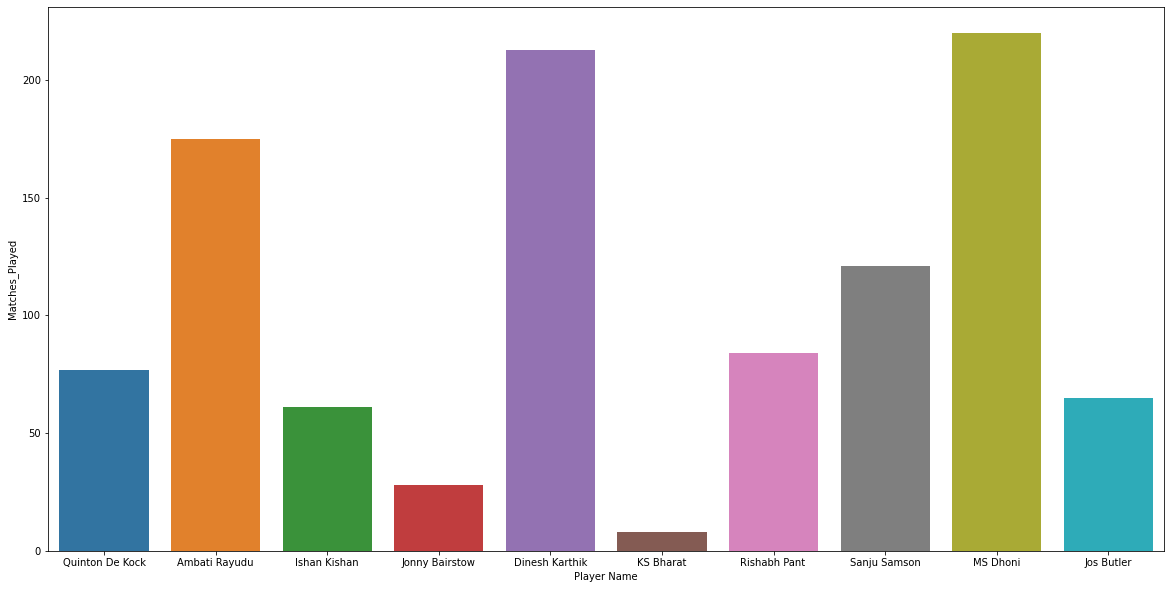

In [200]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_keepers)

<AxesSubplot:xlabel='Player Name', ylabel='Stumps'>

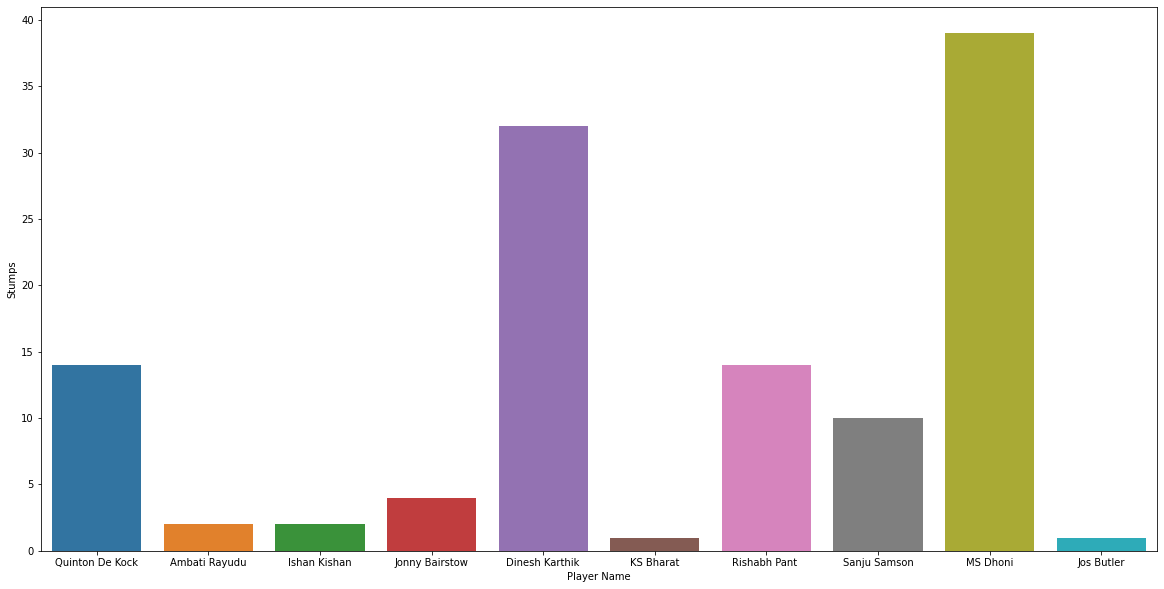

In [201]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Stumps',data=top_keepers)

<AxesSubplot:xlabel='Player Name', ylabel='Strike_Rate'>

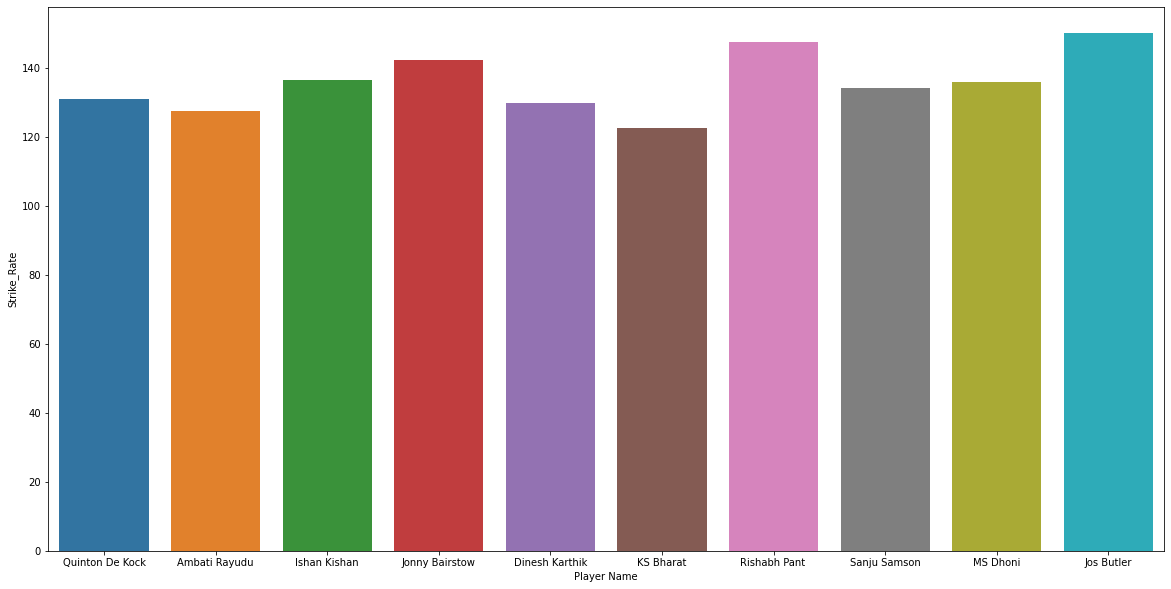

In [202]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_keepers)

<AxesSubplot:xlabel='Player Name', ylabel='Run_outs'>

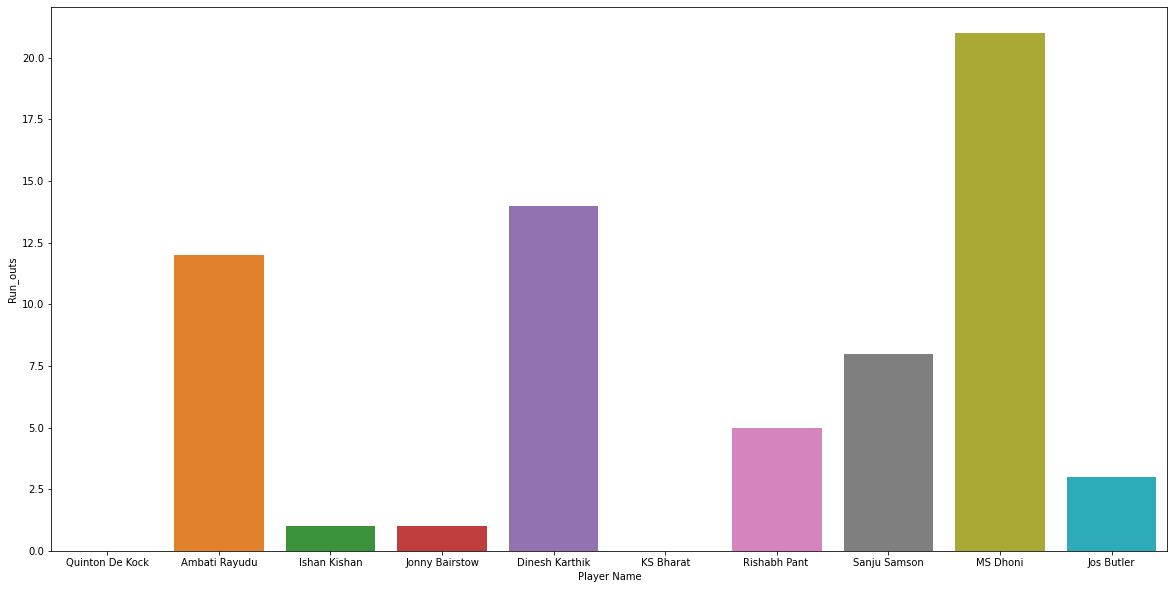

In [203]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Run_outs',data=top_keepers)

### For our final analysis we will consider the ratio of players in the best 11 as follows:

1. 3 Batters

2. 3 Allrounders

3. 4 Bowlers with 2 spin Options

4. 1 Wicket keeper

<AxesSubplot:title={'center':'Average'}>

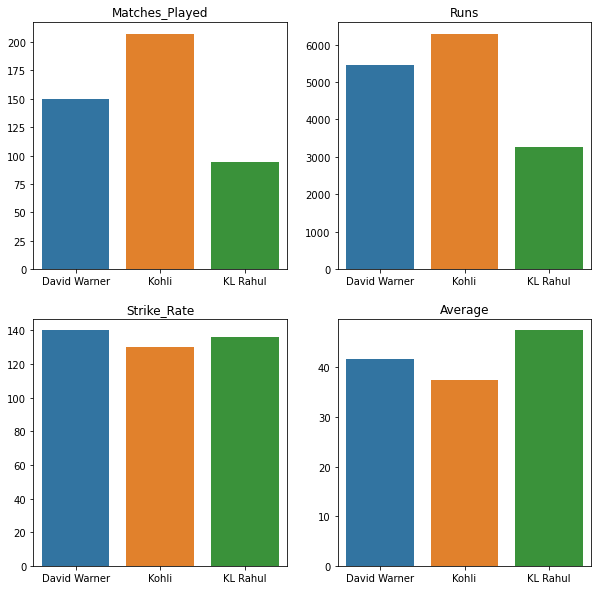

In [248]:
#Batters for the  final 11 -- KL Rahul,Kohli,David Warner
#here we are storing the values of each player in a separate dataframe to use for displaying the barplot

top_batters.reset_index(drop=True)
matches_values = [top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played'],top_batters.iloc[6]['Matches_Played']]
Runs = [top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs'],top_batters.iloc[6]['Runs']]
strike_Rate = [top_batters.iloc[2]['Strike_Rate'],top_batters.iloc[5]['Strike_Rate'],top_batters.iloc[6]['Strike_Rate']]
Average = [top_batters.iloc[2]['Average'],top_batters.iloc[5]['Average'],top_batters.iloc[6]['Average']]

labels=['David Warner','Kohli','KL Rahul']

fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0][0].set_title("Matches_Played")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Strike_Rate")
axes[1][1].set_title("Average")
sns.barplot(x=labels,y=matches_values,ax=axes[0][0])
sns.barplot(x=labels,y=Runs,ax=axes[0][1])
sns.barplot(x=labels,y=strike_Rate,ax=axes[1][0])
sns.barplot(x=labels,y=Average,ax=axes[1][1])

<AxesSubplot:title={'center':'Economy'}>

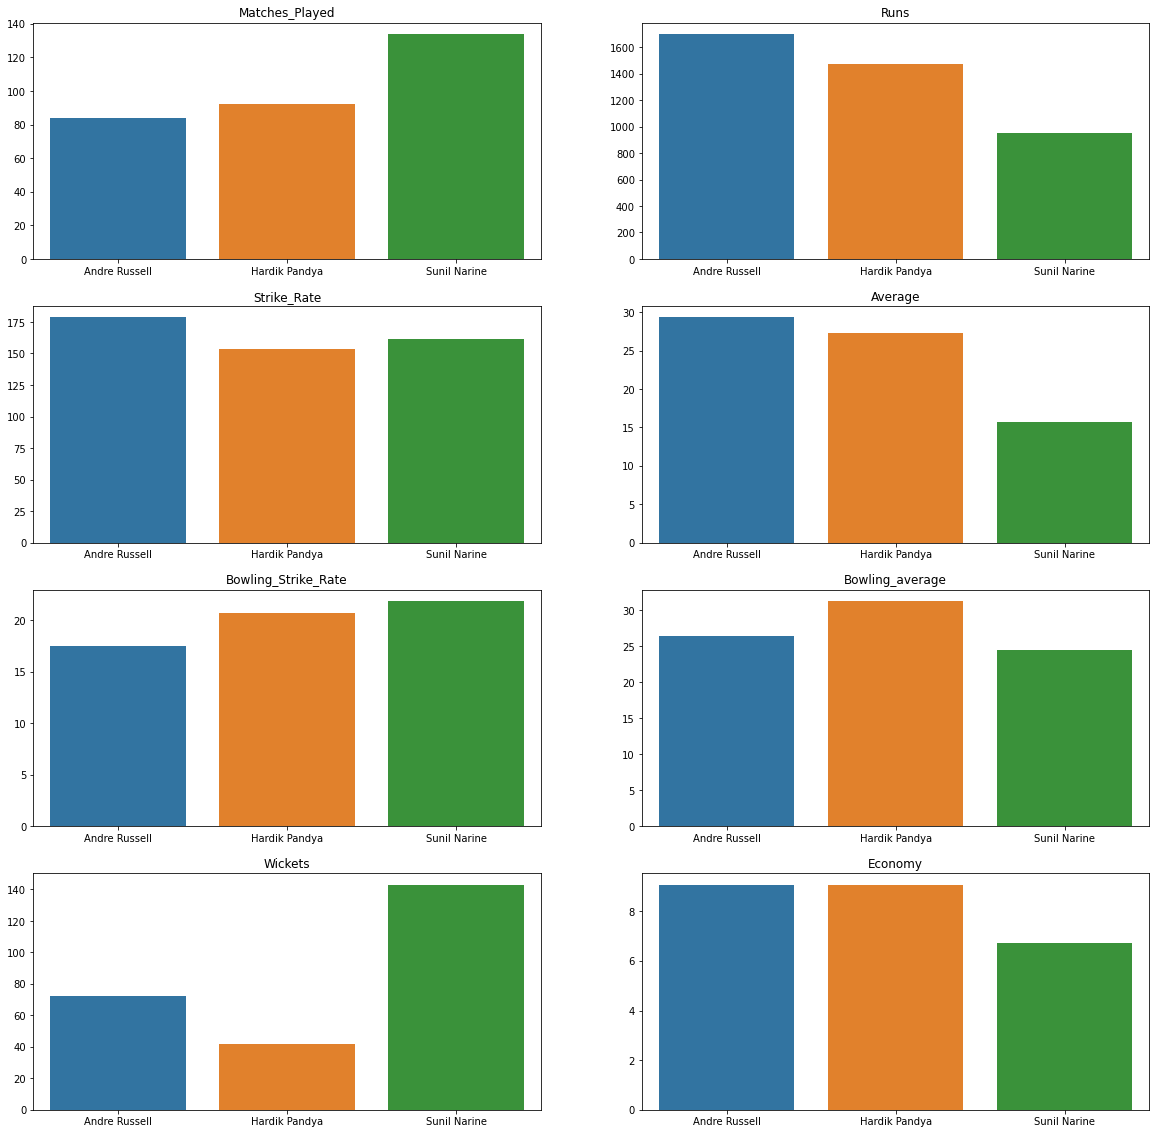

In [242]:
##Allrounder for the finale 11 --Andre Russell,Sunil Narine,Hardik Pandya

top_Allrounders.reset_index(drop=True)

matches_values=[top_Allrounders.iloc[5]['Matches_Played'],top_Allrounders.iloc[6]['Matches_Played'],top_Allrounders.iloc[9]['Matches_Played']]
Runs=[top_Allrounders.iloc[5]['Runs'],top_Allrounders.iloc[6]['Runs'],top_Allrounders.iloc[9]['Runs']]
Strike_Rate=[top_Allrounders.iloc[5]['Strike_Rate'],top_Allrounders.iloc[6]['Strike_Rate'],top_Allrounders.iloc[9]['Strike_Rate']]
Average=[top_Allrounders.iloc[5]['Average'],top_Allrounders.iloc[6]['Average'],top_Allrounders.iloc[9]['Average']]
Bowling_Strike_Rate=[top_Allrounders.iloc[5]['Bowling_Strike_Rate'],top_Allrounders.iloc[6]['Bowling_Strike_Rate'],top_Allrounders.iloc[9]['Bowling_Strike_Rate']]
Bowling_average=[top_Allrounders.iloc[5]['Bowling_average'],top_Allrounders.iloc[6]['Bowling_average'],top_Allrounders.iloc[9]['Bowling_average']]
Wicket=[top_Allrounders.iloc[5]['Wickets'],top_Allrounders.iloc[6]['Wickets'],top_Allrounders.iloc[9]['Wickets']]
Economy=[top_Allrounders.iloc[5]['Economy'],top_Allrounders.iloc[6]['Economy'],top_Allrounders.iloc[9]['Economy']]
         
labels=['Andre Russell','Hardik Pandya','Sunil Narine']
         
fig,axes=plt.subplots(4,2,figsize=(20,20))
         
axes[0][0].set_title('Matches_Played')
axes[0][1].set_title('Runs')
axes[1][0].set_title('Strike_Rate')
axes[1][1].set_title('Average')
axes[2][0].set_title('Bowling_Strike_Rate')
axes[2][1].set_title('Bowling_average')
axes[3][0].set_title('Wickets')
axes[3][1].set_title('Economy')

sns.barplot(x=labels,y=matches_values,ax=axes[0][0])
sns.barplot(x=labels,y=Runs,ax=axes[0][1])
sns.barplot(x=labels,y=Strike_Rate,ax=axes[1][0])
sns.barplot(x=labels,y=Average,ax=axes[1][1])
sns.barplot(x=labels,y=Bowling_Strike_Rate,ax=axes[2][0])
sns.barplot(x=labels,y=Bowling_average,ax=axes[2][1])
sns.barplot(x=labels,y=Wicket,ax=axes[3][0])
sns.barplot(x=labels,y=Economy,ax=axes[3][1])
         

<AxesSubplot:title={'center':'Economy'}>

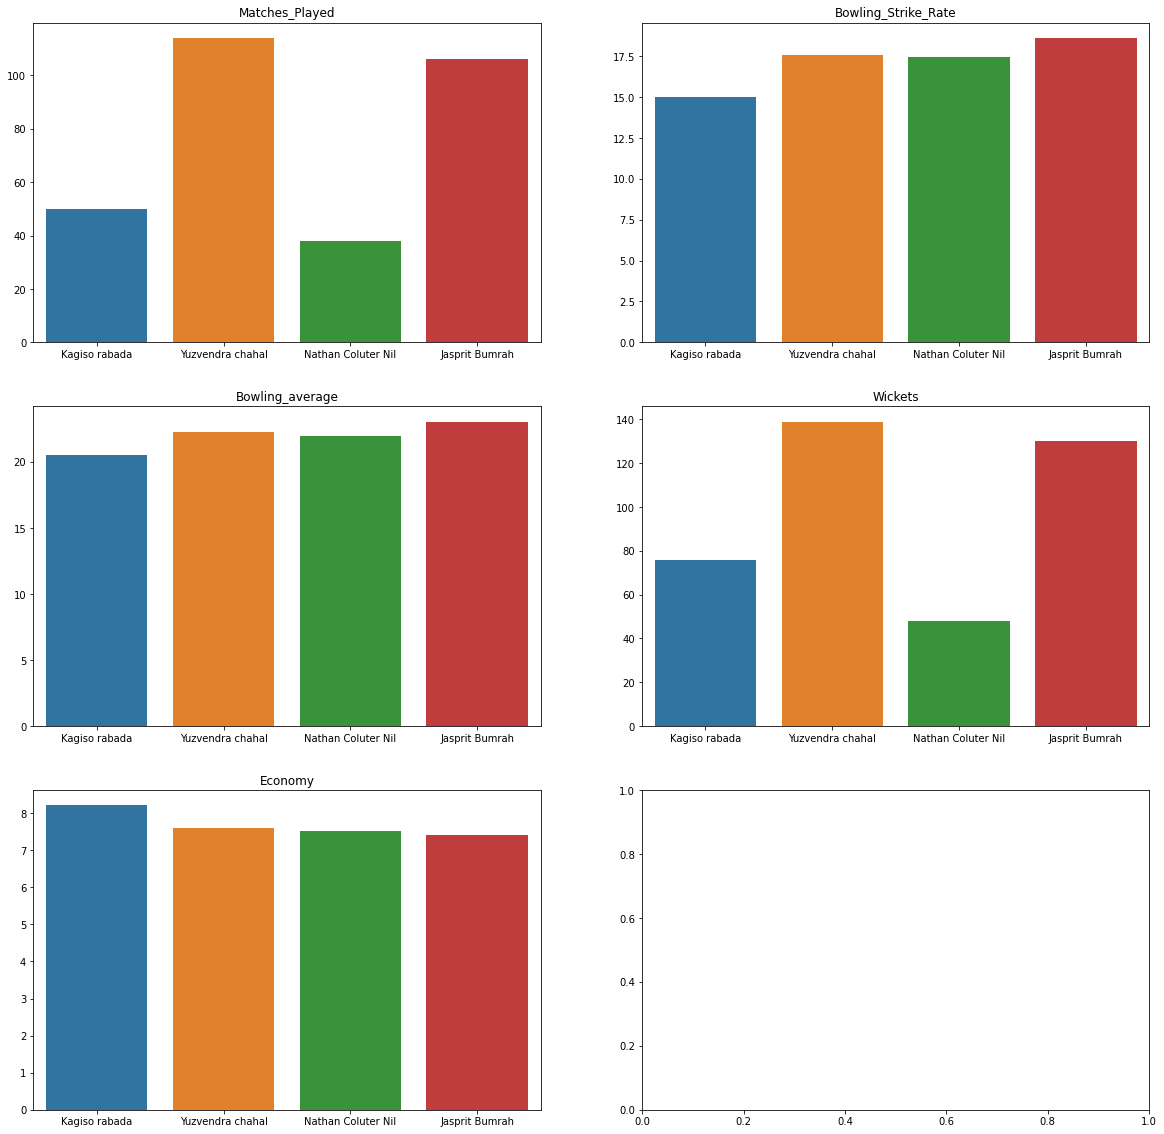

In [240]:
##bowler for the finale 11 --Kagiso rabada,Yuzvendra chahal,Jasprit Bumrah,Nathan Coluter Nil
top_bowlers.reset_index(drop=True)

matches_values=[top_bowlers.iloc[0]['Matches_Played'],top_bowlers.iloc[1]['Matches_Played'],top_bowlers.iloc[7]['Matches_Played'],top_bowlers.iloc[10]['Matches_Played']]
Bowling_Strike_Rate=[top_bowlers.iloc[0]['Bowling_Strike_Rate'],top_bowlers.iloc[1]['Bowling_Strike_Rate'],top_bowlers.iloc[7]['Bowling_Strike_Rate'],top_bowlers.iloc[10]['Bowling_Strike_Rate']]
Bowling_average=[top_bowlers.iloc[0]['Bowling_average'],top_bowlers.iloc[1]['Bowling_average'],top_bowlers.iloc[7]['Bowling_average'],top_bowlers.iloc[10]['Bowling_average']]
Wicket=[top_bowlers.iloc[0]['Wickets'],top_bowlers.iloc[1]['Wickets'],top_bowlers.iloc[7]['Wickets'],top_bowlers.iloc[10]['Wickets']]
Economy=[top_bowlers.iloc[0]['Economy'],top_bowlers.iloc[1]['Economy'],top_bowlers.iloc[7]['Economy'],top_bowlers.iloc[10]['Economy']]
         
labels=['Kagiso rabada','Yuzvendra chahal','Nathan Coluter Nil','Jasprit Bumrah']
         
fig,axes=plt.subplots(3,2,figsize=(20,20))
         
axes[0][0].set_title('Matches_Played')
axes[0][1].set_title('Bowling_Strike_Rate')
axes[1][0].set_title('Bowling_average')
axes[1][1].set_title('Wickets')
axes[2][0].set_title('Economy')

sns.barplot(x=labels,y=matches_values,ax=axes[0][0])
sns.barplot(x=labels,y=Bowling_Strike_Rate,ax=axes[0][1])
sns.barplot(x=labels,y=Bowling_average,ax=axes[1][0])
sns.barplot(x=labels,y=Wicket,ax=axes[1][1])
sns.barplot(x=labels,y=Economy,ax=axes[2][0])
         

<AxesSubplot:title={'center':'keeping states'}>

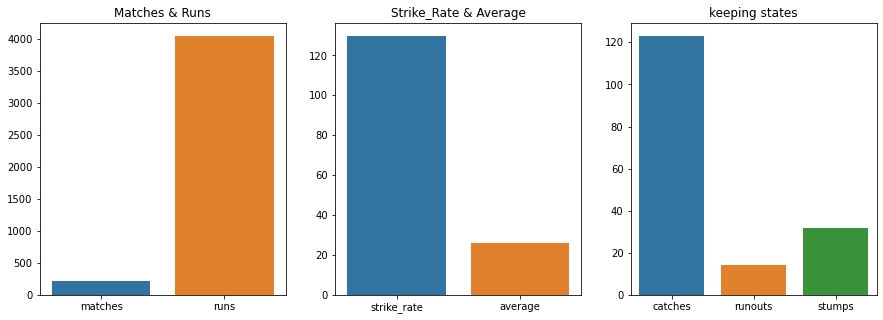

In [257]:
##keeper for the finale 11 --MS Dhoni

top_keepers.reset_index(drop=True)

matches_values=[top_keepers.iloc[4]['Matches_Played'],top_keepers.iloc[4]['Runs']]
Strike_Rate=[top_keepers.iloc[4]['Strike_Rate'],top_keepers.iloc[4]['Average']]
keeping_states=[top_keepers.iloc[4]['Catches'],top_keepers.iloc[4]['Run_outs'],top_keepers.iloc[4]['Stumps']]

         
labels1=['matches','runs']
labels2=['strike_rate','average']
labels3=['catches','runouts','stumps']

         
fig,axes=plt.subplots(1,3,figsize=(15,5))
         
axes[0].set_title('Matches & Runs')
axes[1].set_title('Strike_Rate & Average')
axes[2].set_title('keeping states')


sns.barplot(x=labels1,y=matches_values,ax=axes[0])
sns.barplot(x=labels2,y=Strike_Rate,ax=axes[1])
sns.barplot(x=labels3,y=keeping_states,ax=axes[2])



### Final 11 For the IPL 2022 Campaign

In [296]:
batter1=top_batters.loc[(top_batters['Player Name']=='KL Rahul ')]
batter2=top_batters.loc[(top_batters['Player Name']=='David Warner ')]
batter3=top_batters.loc[(top_batters['Player Name']=='Virat Kohli')]

bowler1=top_bowlers.loc[(top_bowlers['Player Name']=='Yuzvendra Chahal ')]
bowler2=top_bowlers.loc[(top_bowlers['Player Name']=='Jasprit Bumrah')]
bowler3=top_bowlers.loc[(top_bowlers['Player Name']=='Nathan Coulter-Nile')]
bowler4=top_bowlers.loc[(top_bowlers['Player Name']=='Kagiso Rabada ')]

allrounder1=top_Allrounders.loc[(top_Allrounders['Player Name']=='Andre Russell')]
allrounder2=top_Allrounders.loc[(top_Allrounders['Player Name']=='Hardik Pandya')]
allrounder3=top_Allrounders.loc[(top_Allrounders['Player Name']=='Sunil Narine ')]

keeper=top_keepers.loc[(top_keepers['Player Name']=='MS Dhoni')]

## Team : 

In [295]:
final =[batter1,batter2,batter3,allrounder1,allrounder2,allrounder3,keeper,bowler1,bowler2,bowler3,bowler4]
final_team=pd.concat(final)
final_team=final_team.drop(labels=['Matches_Played','Runs','Average','Strike_Rate','Wickets','Bowling_average','Economy','Bowling_Strike_Rate','Catches','Run_outs','Stumps'],axis=1)
final_team.reset_index(drop=True)

,Player Name,Team,Nationality
0,KL Rahul,Lucknow,Indian
1,David Warner,Delhi,Overseas
2,Virat Kohli,Bangalore,Indian
3,Andre Russell,Kolkata,Overseas
4,Hardik Pandya,Gujarat,Indian
5,Sunil Narine,Kolkata,Overseas
6,MS Dhoni,Chennai,Indian
7,Yuzvendra Chahal,Rajasthan,Indian
8,Jasprit Bumrah,Mumbai,Indian
9,Nathan Coulter-Nile,Rajasthan,Overseas
